Set-up

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from statannotations.Annotator import Annotator

In [33]:
os.getcwd()
#working directory should be /Code/CodeFigure1

'/Users/emilly/Library/CloudStorage/Dropbox/UCSF Nystul Lab/NystulLabRepo/WolfgramAgingOvary/Code/CodeFigure1'

Plotting Phenotype Penetrance by Weeks

Note: You will need to run the StatsPhenotypePenetrance.Rmd file first, or annotate out the stats code

In [2]:
csv_path = "../../Data/DataFigure1/w1118Phenotype_n.csv"
df = pd.read_csv(csv_path)

In [3]:
df['PercentPhenotype'] = df['Phenotype'] * 100

df.head(20)

,Weeks,Phenotype,Experiment,n,N,PercentPhenotype
0,1,0.062500,EdU,19,1,6.250000
1,1,0.272727,EdU,22,2,27.272727
2,1,0.062500,EdU,16,3,6.250000
3,1,0.170732,EdU,41,4,17.073171
4,1,0.260870,pHH3,23,5,26.086957
5,1,0.064103,pHH3,78,6,6.410256
6,1,0.111110,pHH3,99,7,11.111000
7,2,0.200000,EdU,25,1,20.000000
8,2,0.129000,EdU,31,2,12.900000
9,2,0.218800,EdU,32,3,21.880000


/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_29849/2351114462.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


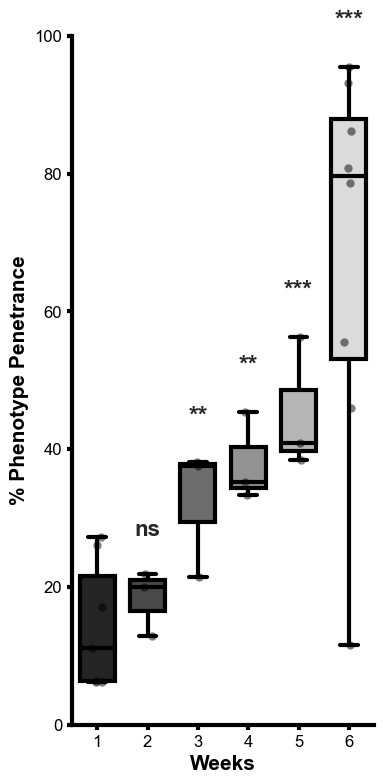

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


stats_path = "../../Results/ResultsFigure1/StatsPhenotypePenetranceDunnetts.csv"
stats = pd.read_csv(stats_path)

stats["Weeks"] = stats["comparison"].str.extract(r"(\d+)").astype(int)
week_to_stars = dict(zip(stats["Weeks"], stats["stars"]))

df["Weeks"] = df["Weeks"].astype(int)

fig, ax = plt.subplots(figsize=(4, 8))
sns.set(style="white")

sns.boxplot(
    data=df,
    x="Weeks",
    y="PercentPhenotype",
    palette="gray",
    ax=ax,
    width=0.7,
    linewidth=3,
    boxprops=dict(edgecolor="black", linewidth=3),
    medianprops=dict(color="black", linewidth=3),
    whiskerprops=dict(color="black", linewidth=3),
    capprops=dict(color="black", linewidth=3),
    flierprops=dict(marker="o", color="black", alpha=0.5)
)

sns.stripplot(
    data=df,
    x="Weeks",
    y="PercentPhenotype",
    ax=ax,
    color="black",
    alpha=0.5,
    size=6,
    jitter=True
)

y_max = df.groupby("Weeks")["PercentPhenotype"].max()
offset = 5

for week, star in week_to_stars.items():
    ax.text(
        x=week - 1,
        y=y_max.loc[week] + offset,
        s=star,
        ha="center",
        va="bottom",
        fontsize=16 if star == "ns" else 18,
        fontweight="bold"
    )

ax.set_ylim(0, 100)
ax.set_ylabel("% Phenotype Penetrance", fontsize=15, weight="bold")
ax.set_xlabel("Weeks", fontsize=15, weight="bold")
ax.tick_params(width=3, labelsize=12)

ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure1', 'PhenotypePenetranceWeeks.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()
